<a href="https://colab.research.google.com/github/abasilio91/aulas_ANN_ufu/blob/main/img_recon_AI_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import numpy as np
 import tensorflow as tf
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
 from tensorflow.keras.optimizers import Adam
 from tensorflow.keras.metrics import categorical_crossentropy
 from tensorflow.keras.preprocessing.image import ImageDataGenerator
 from sklearn.metrics import confusion_matrix
 import itertools
 import os
 import shutil
 import random
 import glob
 import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/abasilio91/aulas_ANN_ufu/

Cloning into 'aulas_ANN_ufu'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 86 (delta 28), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (86/86), done.


In [3]:
%cd aulas_ANN_ufu/

/content/aulas_ANN_ufu


In [5]:
import zipfile as zp

file_name = 'cats_and_dogs.zip'

extracted = zp.ZipFile(file_name,'r')
extracted.extractall()

In [6]:
%cd cats_and_dogs/

if os.path.isdir('train/dog') is False:
  os.makedirs('train/dog')
  os.makedirs('train/cat')
  os.makedirs('val/dog')
  os.makedirs('val/cat')
  os.makedirs('test/dog')
  os.makedirs('test/cat')

/content/aulas_ANN_ufu/cats_and_dogs


In [13]:
# Each animal has 300 pictures. It was arbitrarily selected the values of 250 pictures to train, 40 to validate and 10 to test for each one.
# This section randomly select pictures to be moved to the assigned label.

for c in random.sample(glob.glob('cat*'), 250):
  shutil.move(c, 'train/cat')
for c in random.sample(glob.glob('cat*'), 40):
  shutil.move(c, 'val/cat')
for c in random.sample(glob.glob('cat*'), 10):
  shutil.move(c, 'test/cat')

for c in random.sample(glob.glob('dog*'), 250):
  shutil.move(c, 'train/dog')
for c in random.sample(glob.glob('dog*'), 40):
  shutil.move(c, 'val/dog')
for c in random.sample(glob.glob('dog*'), 10):
  shutil.move(c, 'test/dog')

%cd ../..

In [17]:
train_path = 'aulas_ANN_ufu/cats_and_dogs/train'
test_path = 'aulas_ANN_ufu/cats_and_dogs/test'
val_path = 'aulas_ANN_ufu/cats_and_dogs/val'

In [50]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
val_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=val_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)

Found 500 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [51]:
imgs, labels = next(train_batches)

In [52]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,10,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


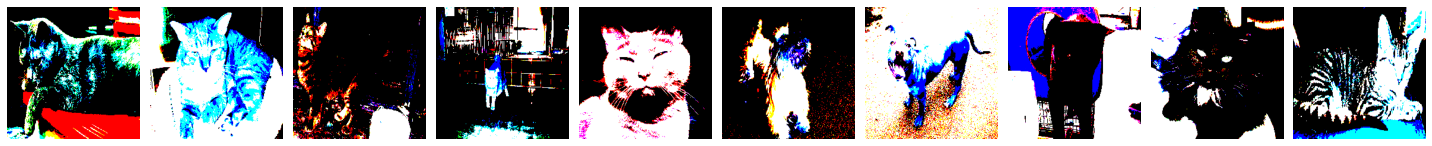

In [53]:
plotImages(imgs)
print(labels)